In [17]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import axelrod as axl
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
plt.style.use("ggplot")

In [18]:
strategy_data_path = '../simulated_data/precalculated_metrics/all_strategy_metrics.csv'


strategy_df = pd.read_csv(strategy_data_path)
strategy_df['strategy_name'] = strategy_df['strategy_name'].str.strip()
strategy_df.fillna(0, inplace=True)



In [19]:
strategy_metrics = {}
for idx, row in strategy_df.iterrows():
    strategy_metrics[row['strategy_name']] = row[['Niceness','Retaliation','Forgiveness','OverallCoop','AvgPayoff']].to_dict()
strategy_metrics

{'AON2': {'Niceness': 1.0,
  'Retaliation': 0.9048521929553368,
  'Forgiveness': 0.0,
  'OverallCoop': 0.7136381578947368,
  'AvgPayoff': 2.780519736842105},
 'APavlov2006': {'Niceness': 1.0,
  'Retaliation': 0.9390716795754448,
  'Forgiveness': 0.6761810193666269,
  'OverallCoop': 0.7605460526315789,
  'AvgPayoff': 2.685269736842105},
 'APavlov2011': {'Niceness': 1.0,
  'Retaliation': 0.8813740142375256,
  'Forgiveness': 0.7037723127823626,
  'OverallCoop': 0.7787105263157895,
  'AvgPayoff': 2.683236842105263},
 'Adaptive': {'Niceness': 1.0,
  'Retaliation': 0.0824213218120346,
  'Forgiveness': 0.0673076923076923,
  'OverallCoop': 0.496781954887218,
  'AvgPayoff': 2.2391870300751884},
 'AdaptiveTitForTat': {'Niceness': 1.0,
  'Retaliation': 0.9346153846153846,
  'Forgiveness': 1.0,
  'OverallCoop': 0.8340404135338345,
  'AvgPayoff': 2.7257857142857147},
 'Aggravater': {'Niceness': 0.0,
  'Retaliation': 1.0,
  'Forgiveness': 0.0,
  'OverallCoop': 0.0897744360902255,
  'AvgPayoff': 1.86

In [20]:
strategies = [axl.FirstByDavis(),axl.ContriteTitForTat(), axl.OnceBitten(), axl.InversePunisher(), axl.InversePunisher()]


In [21]:
strategy_order = [player.__class__.__name__ for player in strategies]

strategy_mapping = {name: player.__class__ for name, player in zip(strategy_order, strategies)}

strategy_mapping

{'FirstByDavis': axelrod.strategies.axelrod_first.FirstByDavis,
 'ContriteTitForTat': axelrod.strategies.titfortat.ContriteTitForTat,
 'OnceBitten': axelrod.strategies.oncebitten.OnceBitten,
 'InversePunisher': axelrod.strategies.punisher.InversePunisher}

In [22]:
df_baseline = pd.read_csv('../simulated_data/simulated_tournamets/gd_baseline.csv')


In [23]:
print("Simulation data shape:", df_baseline.shape)
print(df_baseline.head())

Simulation data shape: (5000, 4)
   Unnamed: 0      composition  coop_rate  \
0           0  [1, 1, 2, 0, 4]      200.0   
1           1  [2, 4, 3, 4, 1]      200.0   
2           2  [4, 0, 2, 4, 3]      200.0   
3           3  [2, 0, 2, 5, 2]      200.0   
4           4  [1, 2, 3, 4, 0]      200.0   

                                    winning_strategy  
0  ['FirstByDavis', 'ContriteTitForTat', 'OnceBit...  
1  ['FirstByDavis', 'ContriteTitForTat', 'OnceBit...  
2  ['FirstByDavis', 'OnceBitten', 'InversePunisher']  
3  ['FirstByDavis', 'OnceBitten', 'InversePunisher']  
4  ['FirstByDavis', 'ContriteTitForTat', 'OnceBit...  


In [24]:
class GeneralizedDefector(axl.Player):
    name = "Generalized Defector"
    classifier = {
        "memory_depth": float("inf"),
        "stochastic": False,
        "makes_use_of": set(),
        "long_run_time": False,
        "inspects_source": False,
        "manipulates_source": False,
        "manipulates_state": False,
    }

    def __init__(self, n=1, m=1):
        super().__init__()
        self.n = n
        self.m = m

    def strategy(self, opponent: axl.Player) -> axl.Action:
        round_number = len(self.history) + 1
        if round_number < self.m:
            return axl.Action.C

        elif (round_number - self.m) % self.n == 0:
            return axl.Action.D
        else:
            return axl.Action.C

In [25]:
S = len(strategy_order)
MAX_GD     = 5
MAX_ITER   = 5000
TOURNS     = 200
REPET      = 1



core_mapping = {
    "FirstByDavis": axl.FirstByDavis(),             
    "ContriteTitForTat": axl.ContriteTitForTat(),
    "OnceBitten": axl.OnceBitten(),
    "InversePunisher":  axl.InversePunisher(),   
    "EvolvedANNNoise05": axl.InversePunisher(), 
}



In [26]:


df_GD = pd.read_csv("../simulated_data/simulated_tournamets/strong_plus_GD.csv")

print("\nSample:")
display(df_GD.head())


Sample:


,Unnamed: 0,composition,gd_slot,gd_k,gd_n,gd_m,coop_rate,winning_strategy
0,0,"[3, 4, 2, 0, 2]",4,2,1,1,134.512397,"['ContriteTitForTat', 'OnceBitten']"
1,1,"[5, 3, 1, 3, 0]",3,3,2,2,149.020833,['FirstByDavis']
2,2,"[4, 1, 5, 5, 3]",4,3,3,3,172.833333,"['FirstByDavis', 'InversePunisher']"
3,3,"[5, 5, 2, 5, 3]",0,5,4,4,164.837500,['InversePunisher']
4,4,"[5, 2, 2, 4, 2]",3,4,5,5,165.084444,['FirstByDavis']


In [27]:
df_GD['composition'] = df_GD['composition'].apply(ast.literal_eval)

df_baseline['composition'] = df_baseline['composition'].apply(ast.literal_eval)

df_baseline['winning_strategy'] = df_baseline['winning_strategy'].apply(ast.literal_eval)

df_GD['winning_strategy'] = df_GD['winning_strategy'].apply(ast.literal_eval)



In [28]:

for df in [df_baseline, df_GD]:
    df["n_winners"]   = df["winning_strategy"].str.len()
    df["single_win"]  = df["n_winners"] == 1

df_GD["gd_tag"] = df_GD.apply(lambda r: f"{r.gd_k}×GD(n={r.gd_n}) in slot {r.gd_slot}", axis=1)

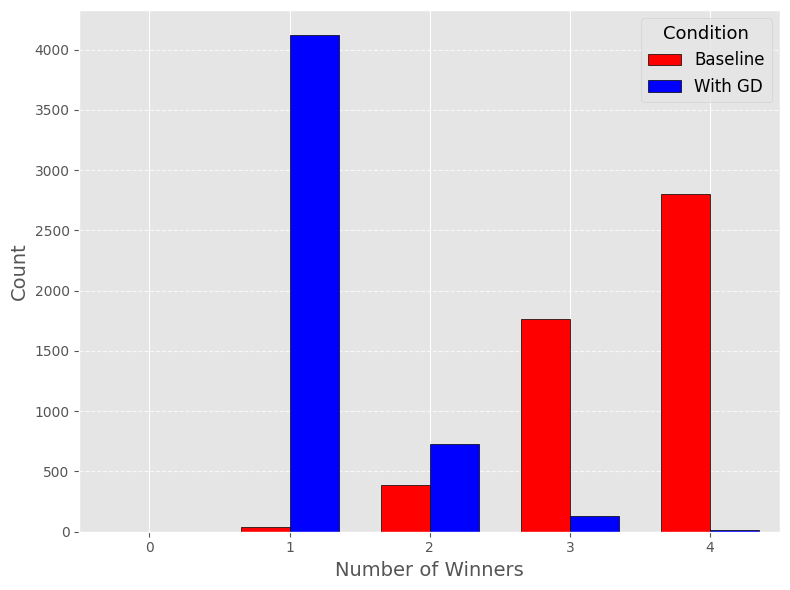

In [29]:
metric = "n_winners"

fig, ax = plt.subplots(figsize=(8, 6))

max_val = int(max(df_baseline[metric].max(), df_GD[metric].max()))
x = np.arange(0, max_val + 1)

baseline_counts = df_baseline[metric].value_counts().reindex(x, fill_value=0).sort_index()
gd_counts = df_GD[metric].value_counts().reindex(x, fill_value=0).sort_index()

bar_width = 0.35

ax.bar(x - bar_width/2, baseline_counts, width=bar_width, label="Baseline", color="red", edgecolor="black")
ax.bar(x + bar_width/2, gd_counts, width=bar_width, label="With GD", color="blue", edgecolor="black")

ax.set_xticks(x)
ax.set_xlim(-0.5, max_val + 0.5)
ax.grid(axis="y", linestyle="--", alpha=0.7)

ax.set_xlabel("Number of Winners", fontsize=14)
ax.set_ylabel("Count", fontsize=14)
ax.legend(title="Condition", fontsize=12, title_fontsize=13, loc="upper right", frameon=True)

plt.tight_layout()
plt.show()

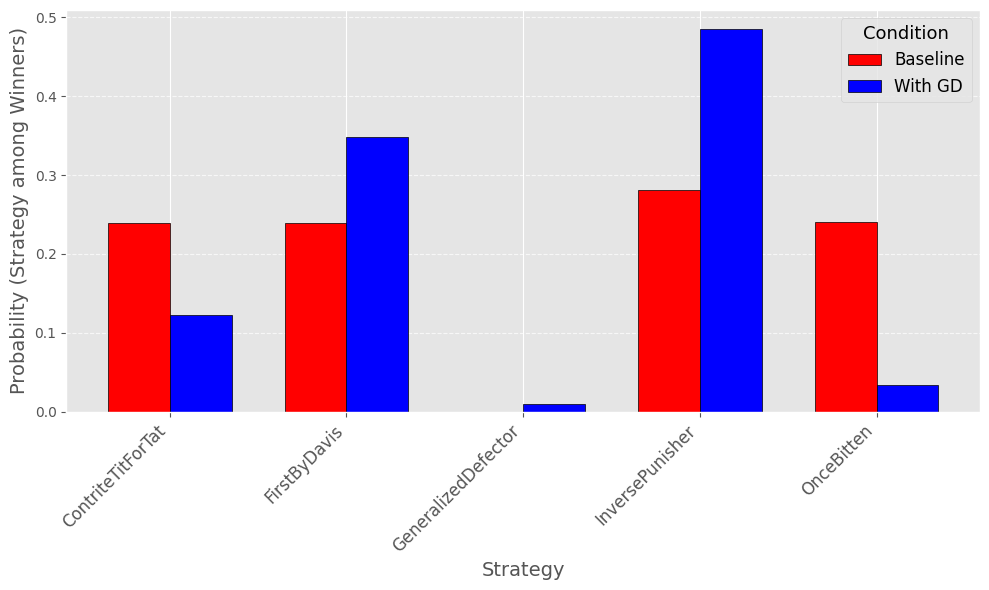

In [30]:
core_strats = df_baseline["winning_strategy"].explode().value_counts(normalize=True)
gd_strats   = df_GD     ["winning_strategy"].explode().value_counts(normalize=True)
compare     = pd.DataFrame({"Baseline": core_strats, "With GD": gd_strats}).fillna(0)

compare = compare.sort_index()

x = np.arange(len(compare))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - bar_width/2, compare["Baseline"], width=bar_width, label="Baseline", color="red", edgecolor="black")
ax.bar(x + bar_width/2, compare["With GD"], width=bar_width, label="With GD", color="blue", edgecolor="black")

ax.set_xticks(x)
ax.set_xticklabels(compare.index, rotation=45, ha="right", fontsize=12)
ax.set_ylim(0, 1.05 * compare.values.max())
ax.grid(axis="y", linestyle="--", alpha=0.7)

ax.set_xlabel("Strategy", fontsize=14)
ax.set_ylabel("Probability (Strategy among Winners)", fontsize=14)
ax.legend(title="Condition", fontsize=12, title_fontsize=13, loc="upper right", frameon=True)

plt.tight_layout()
plt.show()